# FACE MASK PRDICTION USING CNN

# Import necessary libraries

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random


# Read data files


In [2]:
DIRECTORY = r"D:\machine learning\archive"

CATEGORIES = ['FASEMASK', 'NOT FASEMASK']

# preprocess the data

In [3]:
DATA = []  #store the image and labals( FASEMASK ( 0 ) and NOT FASEMASK ( 1 ) ) 

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
        new_arr = cv2.resize(arr, (160, 160))           #resize the image using cv2
        DATA.append([new_arr, label])

In [4]:
DATA[0]

[array([[[103, 100, 102],
         [ 92,  89,  91],
         [ 77,  76,  77],
         ...,
         [ 23,  25,  25],
         [ 37,  28,  23],
         [135,  80,  55]],
 
        [[ 83,  85,  89],
         [ 82,  83,  84],
         [ 74,  73,  73],
         ...,
         [ 28,  23,  26],
         [ 28,  20,  17],
         [103,  63,  38]],
 
        [[ 75,  84,  88],
         [ 76,  80,  81],
         [ 71,  71,  68],
         ...,
         [ 27,  22,  25],
         [ 39,  31,  22],
         [115,  68,  42]],
 
        ...,
 
        [[ 86,  84,  87],
         [ 90,  86,  92],
         [ 87,  80,  89],
         ...,
         [ 36,  31,  32],
         [ 32,  27,  28],
         [ 30,  25,  26]],
 
        [[ 84,  81,  83],
         [ 89,  85,  91],
         [ 85,  79,  88],
         ...,
         [ 37,  32,  33],
         [ 33,  27,  29],
         [ 32,  27,  28]],
 
        [[ 95,  90,  92],
         [ 99,  96, 102],
         [ 98,  92, 102],
         ...,
         [ 38,  33,  34],
  

In [5]:
# Shuffle the DATA list because the first are cat and last are dog in storing
# so suffle the data for training
random.shuffle(DATA)



In [6]:
DATA[3]

[array([[[ 82,  95,  93],
         [ 82,  95,  93],
         [ 83,  96,  94],
         ...,
         [138, 159, 150],
         [ 99, 107, 102],
         [  7,  15,  20]],
 
        [[ 83,  96,  94],
         [ 84,  97,  95],
         [ 85,  98,  96],
         ...,
         [131, 151, 142],
         [101, 109, 104],
         [  7,  15,  20]],
 
        [[ 85,  98,  96],
         [ 86,  99,  97],
         [ 86,  99,  97],
         ...,
         [115, 135, 126],
         [102, 111, 105],
         [  7,  15,  19]],
 
        ...,
 
        [[139, 123, 128],
         [139, 123, 128],
         [140, 124, 129],
         ...,
         [162, 171, 166],
         [171, 178, 174],
         [164, 170, 166]],
 
        [[138, 122, 127],
         [139, 123, 128],
         [140, 124, 129],
         ...,
         [164, 173, 168],
         [180, 187, 183],
         [165, 171, 167]],
 
        [[137, 122, 127],
         [136, 123, 128],
         [140, 124, 129],
         ...,
         [163, 171, 166],
  

# separete the inputs and labals

In [7]:
INPUT = []  #   store the images in list
LABELS = []  #   store the labals of image
for input_labals in DATA:
    INPUT.append(input_labals[0])
    LABELS.append(input_labals[1])
    

In [8]:
print(len(INPUT))
print(len(LABELS))

957
957


In [9]:
INPUT = np.array(INPUT) / 255.0    # for normalization because they are 255 pixel in each chanel so each pixel is bw 0 and 1
LABELS = np.array(LABELS)

In [10]:
INPUT[3]

array([[[0.32156863, 0.37254902, 0.36470588],
        [0.32156863, 0.37254902, 0.36470588],
        [0.3254902 , 0.37647059, 0.36862745],
        ...,
        [0.54117647, 0.62352941, 0.58823529],
        [0.38823529, 0.41960784, 0.4       ],
        [0.02745098, 0.05882353, 0.07843137]],

       [[0.3254902 , 0.37647059, 0.36862745],
        [0.32941176, 0.38039216, 0.37254902],
        [0.33333333, 0.38431373, 0.37647059],
        ...,
        [0.51372549, 0.59215686, 0.55686275],
        [0.39607843, 0.42745098, 0.40784314],
        [0.02745098, 0.05882353, 0.07843137]],

       [[0.33333333, 0.38431373, 0.37647059],
        [0.3372549 , 0.38823529, 0.38039216],
        [0.3372549 , 0.38823529, 0.38039216],
        ...,
        [0.45098039, 0.52941176, 0.49411765],
        [0.4       , 0.43529412, 0.41176471],
        [0.02745098, 0.05882353, 0.0745098 ]],

       ...,

       [[0.54509804, 0.48235294, 0.50196078],
        [0.54509804, 0.48235294, 0.50196078],
        [0.54901961, 0

In [11]:

INPUT = INPUT.reshape(-1, 160, 160, 3)  #  only gray (1) channel

# Made the CNN Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [13]:
model=Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(INPUT,LABELS, epochs=5, validation_split=0.1)

Epoch 1/5
27/27 [==============================] - 28s 982ms/step - loss: 0.4384 - accuracy: 0.8200 - val_loss: 0.3180 - val_accuracy: 0.8750
Epoch 2/5
27/27 [==============================] - 27s 1s/step - loss: 0.3248 - accuracy: 0.8537 - val_loss: 0.2894 - val_accuracy: 0.8750
Epoch 3/5
27/27 [==============================] - 29s 1s/step - loss: 0.1962 - accuracy: 0.9129 - val_loss: 0.3861 - val_accuracy: 0.8646
Epoch 4/5
27/27 [==============================] - 38s 1s/step - loss: 0.0891 - accuracy: 0.9652 - val_loss: 0.5121 - val_accuracy: 0.8542
Epoch 5/5
27/27 [==============================] - 29s 1s/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.6362 - val_accuracy: 0.8542


In [16]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
def image(path):
    img = mpimg.imread(path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    img = cv2.imread( path, cv2.IMREAD_COLOR)
    new_arr = cv2.resize(img, (160, 160))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 160, 160, 3)
    return new_arr

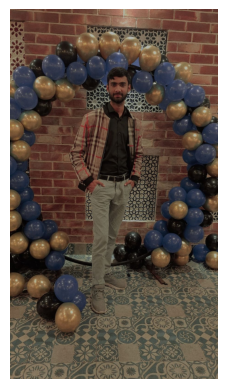

1/1 [==============================] - 0s 110ms/step
NOT FASEMASK


In [17]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
prediction = model.predict([image(r"D:\machine learning\archive\NOT FASEMASK\IMG-20240130-WA0011.jpg")])
print(CATEGORIES[prediction.argmax()])